# Fase1:Tech Challenge - Medical Insurance EDA and Regression

## Declaração do Problema
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio pode ser algo como no exemplo a seguir:

idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332

## Dataset Research
 O dataset medical_insurance.csv foi composto dos dados fornecidos pelo problema e pesquisas realizadas ao site Kaggle: 
 
 [Kaggle - Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) 
 
 [Kaggle - Medical Insurance Cost Prediction](https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction).
 
O cabeçalho do dataset foi adodato a ligua ingleza para facilitar a padronização e manipulação dos dados.
O Dataset contém 7 colunas , sendo elas:
- age: idade
- sex: sexo
- bmi: índice de massa corporal
- children: número de filhos/dependentes
- smoker: fumante
- region: região
- charges: encargos

### Importação das bibliotecas e dos dados

In [1]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregamento dos dados
pd.set_option('display.max_columns', None) # Para mostrar todas as colunas
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,31109.889763
1,46,male,25.857395,1,no,northeast,26650.702647
2,32,male,23.014840,0,no,southwest,21459.037990
3,19,female,27.900000,0,yes,southwest,16884.924000
4,18,male,33.770000,1,no,southeast,1725.552300


### Conhecendo os dados


In [3]:
# Verificando o tamanho do dataset
df.shape

(4113, 7)

In [4]:
# Verificando os tipos de dados
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Observamos que somente algumas colunas são numéricas, enquanto outras são categóricas(object).

In [5]:
# Verificando valores nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Verificando valores duplicados
df.duplicated().sum()

2773

In [7]:
# Verificando a descrição dos dados 
df.describe()

,age,bmi,children,charges
count,4113.000000,4113.000000,4113.000000,4113.000000
mean,39.145393,30.685731,1.099441,13273.902783
std,14.067748,6.117991,1.211401,12137.945368
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4719.524050
50%,39.000000,30.400000,1.000000,9377.904700
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


### Análise Exploratória dos Dados

Vamos analisar a distribuição das variáveis, a correlação entre elas e a distribuição dos encargos por região, fumantes, sexo, número de filhos, idade e índice de massa corporal.

Para evoluirmos com uma analise exploratória dos dados, vamos realizar as seguintes etapas:
- Verificar a distribuição das variáveis
- Verificar a correlação das variáveis
- Verificar a distribuição dos encargos por região
- Verificar a distribuição dos encargos por fumantes
- Verificar a distribuição dos encargos por sexo
- Verificar a distribuição dos encargos por número de filhos
- Verificar a distribuição dos encargos por idade
- Verificar a distribuição dos encargos por índice de massa corporal


Primeiramente vamos ajustar os dados para facilitar a análise exploratória. Deixando os dados categóricos em formato numérico. Para fins academicos vamos utilizar o LabelEncoder para transformar as variáveis categóricas em numéricas. E o One Hot Encoding para a variável região.

In [8]:
# Transformando as variáveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

In [9]:
# One hot encoding para a variável região
df = pd.get_dummies(df, columns=['region'], drop_first=False, prefix='region')


In [15]:
# Verificando os dados após a transformação
print(df.dtypes)
print("----------------------------------")
print(df.head())
print("----------------------------------")
print(df.tail())
print("----------------------------------")
print(df.shape)
print("----------------------------------")
print(df.describe())


age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
----------------------------------
   age  sex        bmi  children  smoker       charges  region_northeast  \
0   56    0  29.774374         2       1  31109.889763             False   
1   46    1  25.857395         1       0  26650.702647              True   
2   32    1  23.014840         0       0  21459.037990             False   
3   19    0  27.900000         0       1  16884.924000             False   
4   18    1  33.770000         1       0   1725.552300             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False             False             False  
2             False             False   

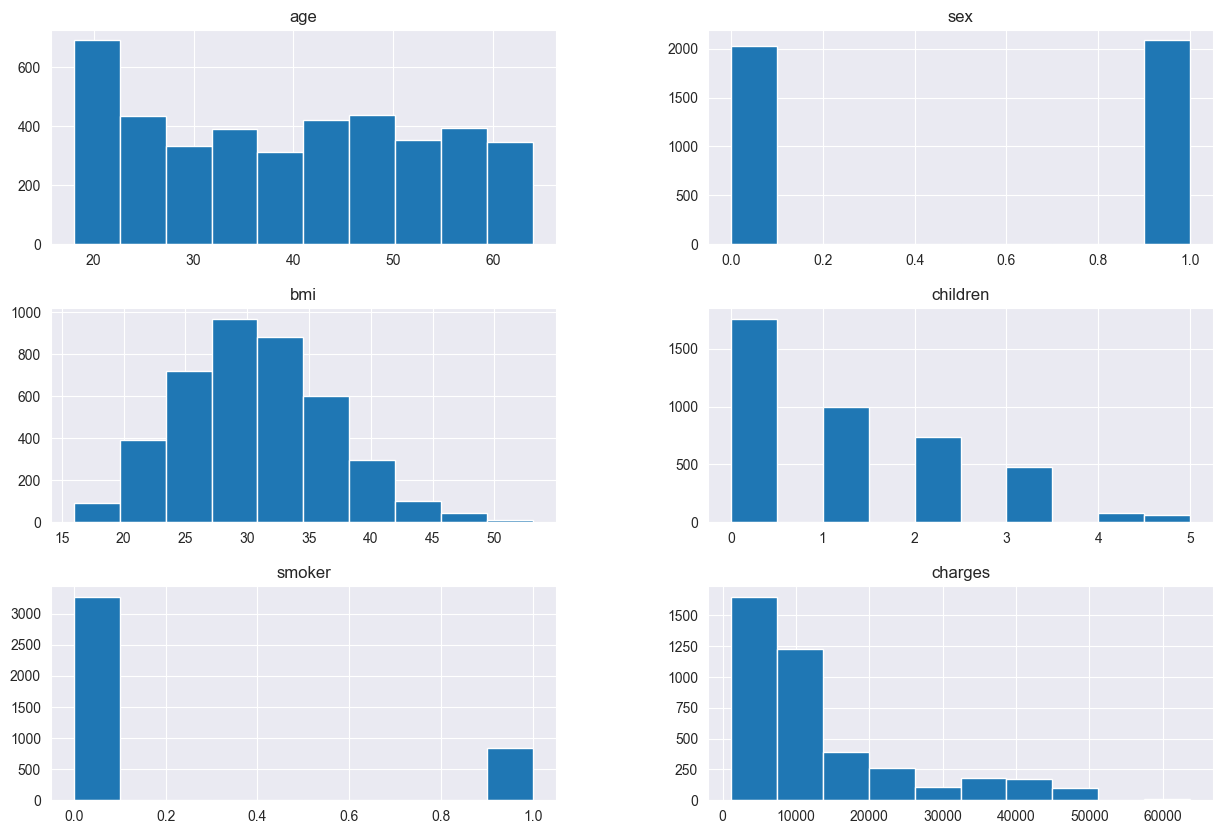

In [24]:
# Verificando a distribuição das variáveis
df.hist(figsize=(15,10))
plt.show()


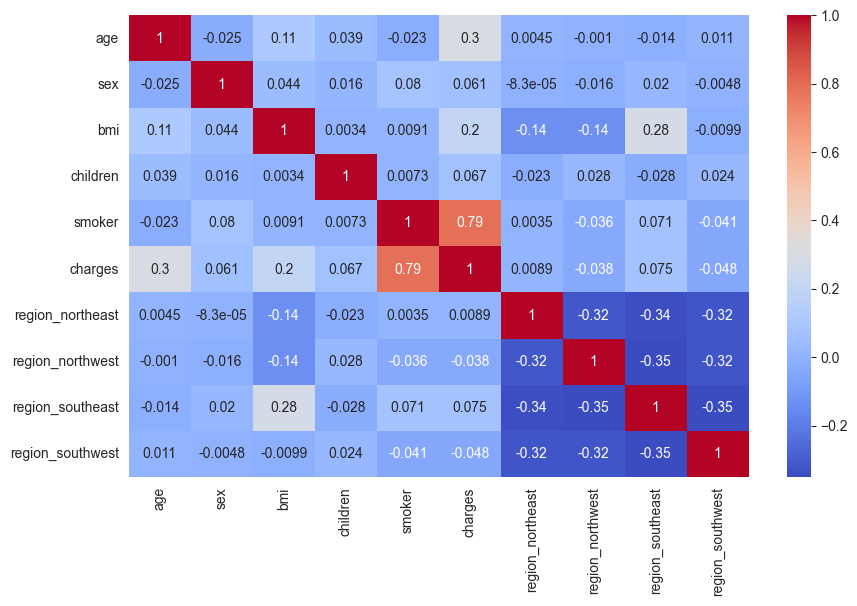

In [17]:
# Verificando a correlação das variáveis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

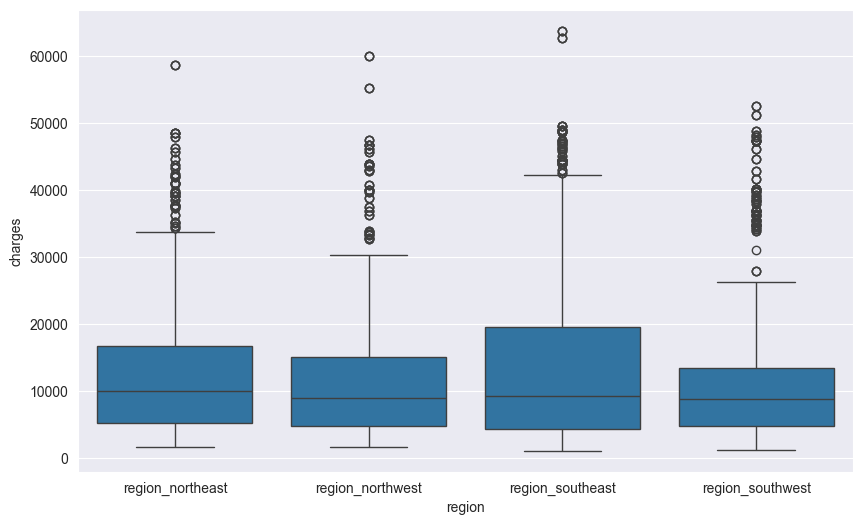

In [27]:
# Crie um DataFrame vazio para armazenar os resultados
df_plot = pd.DataFrame(columns=['region', 'charges'])
region_columns = [col for col in df.columns if 'region' in col]

# Para cada coluna de região
for col in region_columns:
    # Crie um DataFrame temporário onde a região é o nome da coluna e 'charges' é o valor correspondente
    temp_df = df[df[col] == 1][['charges']].copy()
    temp_df['region'] = col
    # Adicione este DataFrame ao DataFrame de plotagem
    df_plot = pd.concat([df_plot, temp_df])

# Agora você pode criar o gráfico boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='charges', data=df_plot)
plt.show()


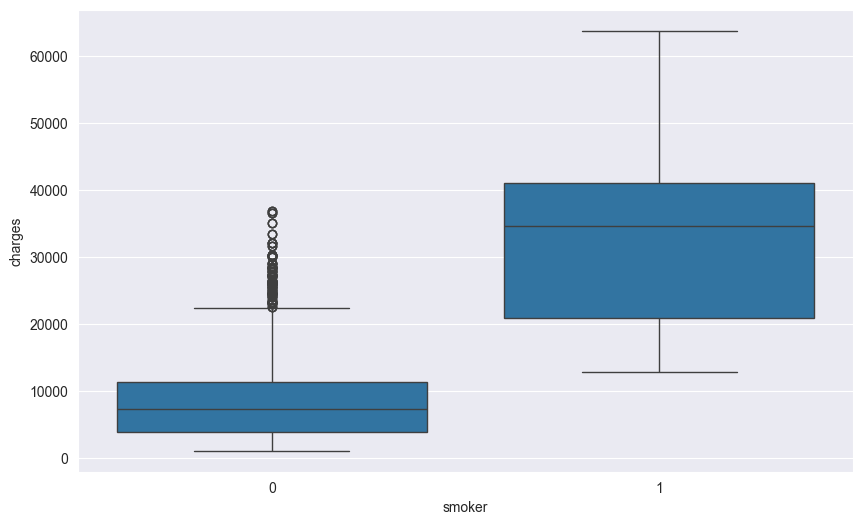

In [28]:
# Verificando a distribuição dos encargos por fumantes
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()


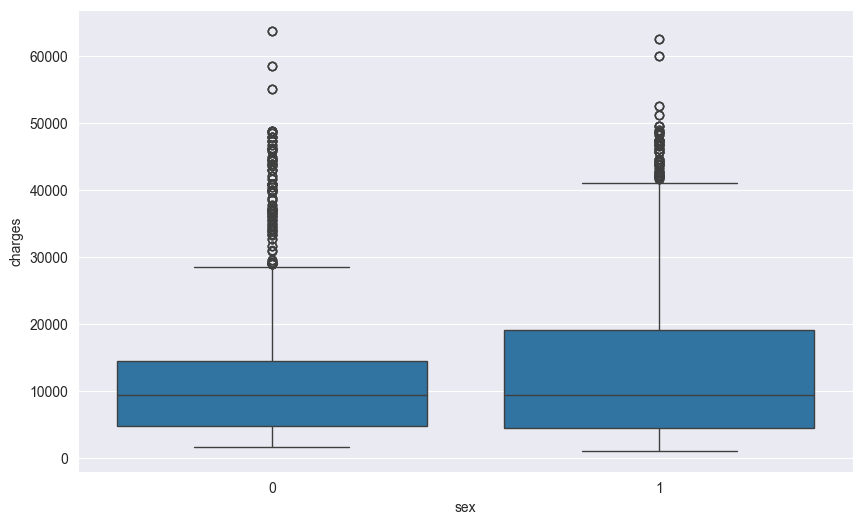

In [29]:
# Verificando a distribuição dos encargos por sexo
plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='charges', data=df)
plt.show()

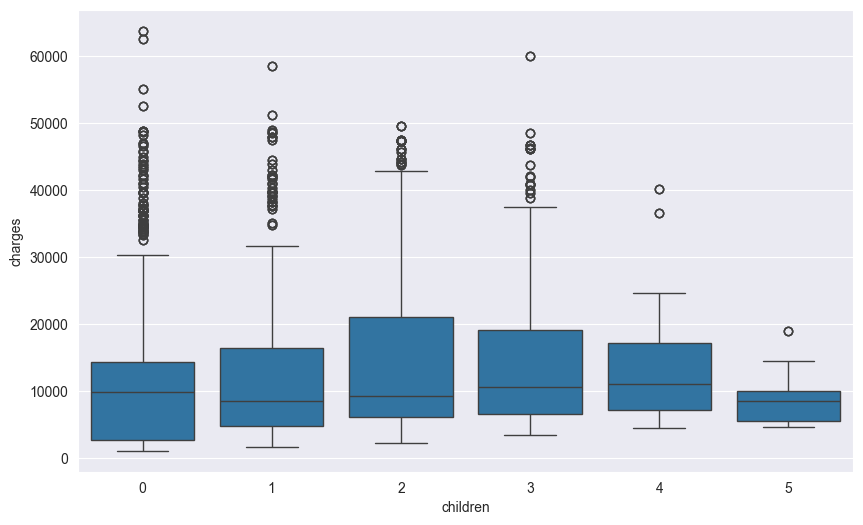

In [30]:
# Verificando a distribuição dos encargos por número de filhos
plt.figure(figsize=(10,6))
sns.boxplot(x='children', y='charges', data=df)
plt.show()

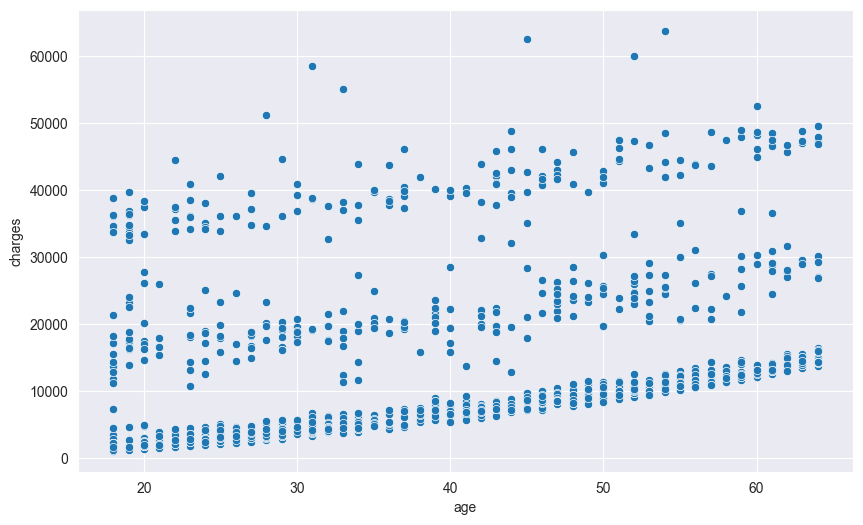

In [31]:
# Verificando a distribuição dos encargos por idade
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', data=df)
plt.show()


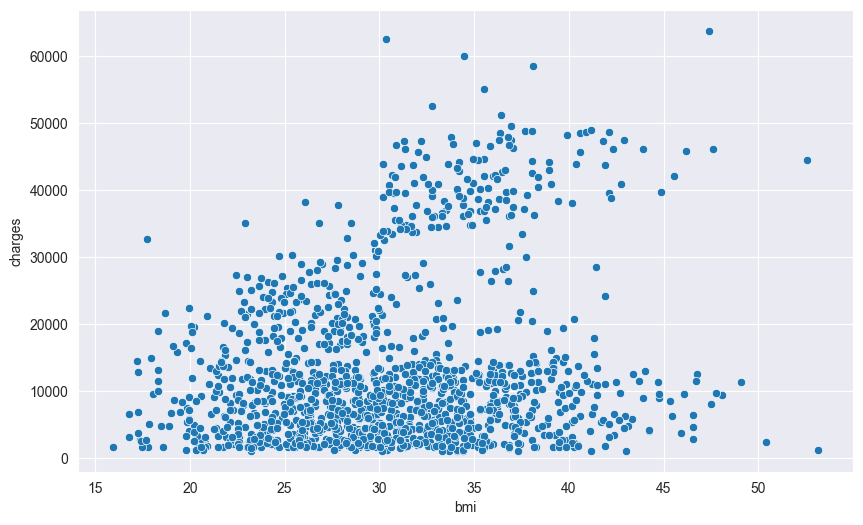

In [32]:
# Verificando a distribuição dos encargos por índice de massa corporal
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()


<Axes: xlabel='charges', ylabel='Density'>

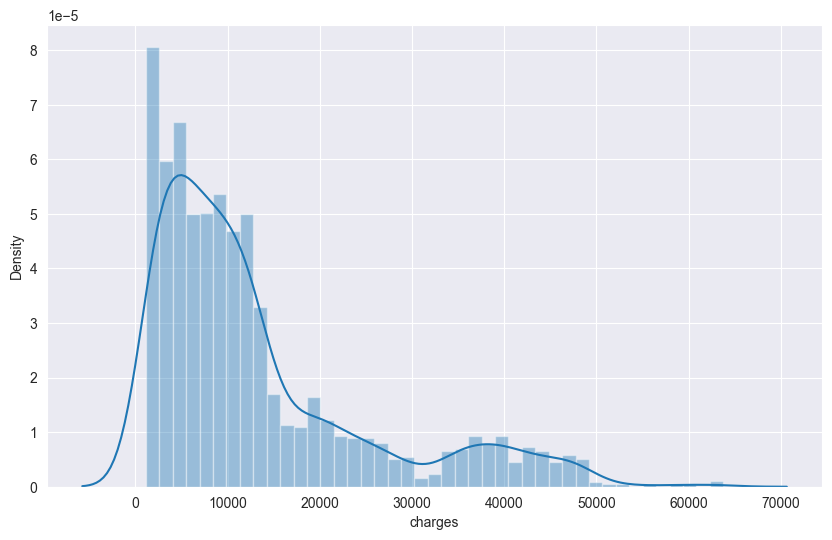

In [33]:
# Verificando a distribuição dos encargos
plt.figure(figsize=(10,6))
sns.distplot(df['charges'])

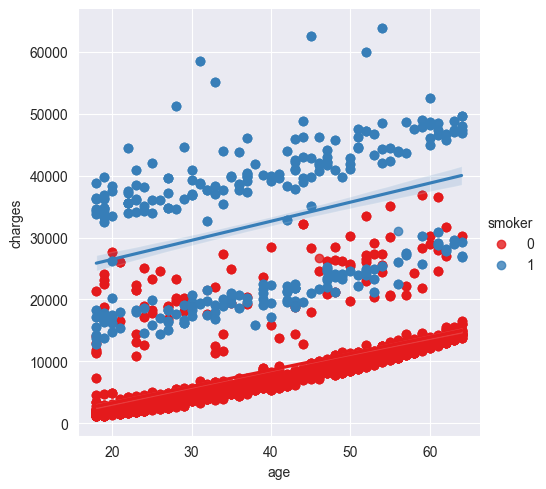

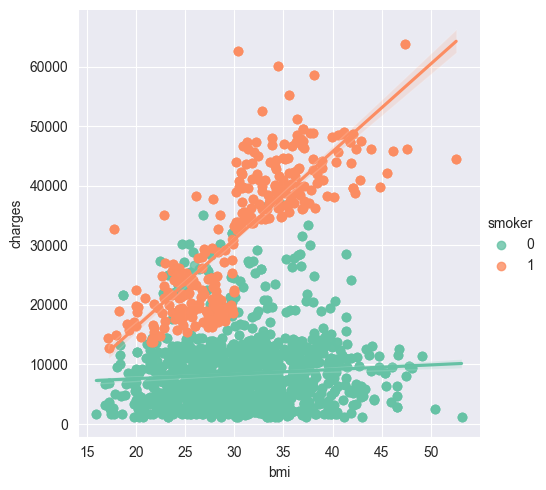

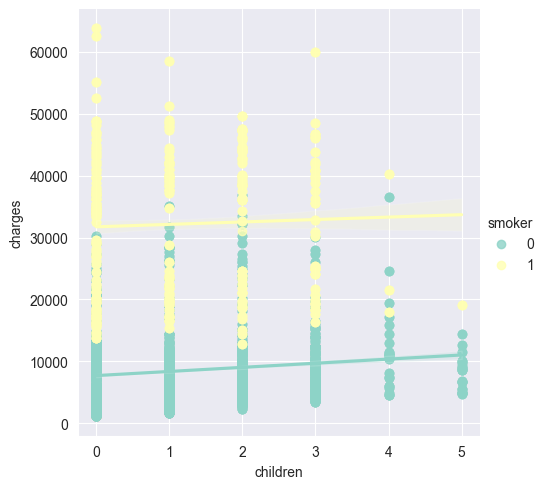

In [35]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

### Modelagem

Vamos separar as variáveis independentes e dependentes, dividir os dados em treino e teste, normalizar os dados e treinar o modelo.

In [60]:
# Separando as variáveis independentes e dependentes
X = df.drop(['charges'], axis=1)
y = df['charges']

In [61]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_regression(model, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Para calcular o MAPE, precisamos evitar a divisão por zero
    # Adicionamos um pequeno valor aos zeros em y_test
    y_test_mape = np.where(y_test == 0, 0.1, y_test)
    mape = np.mean(np.abs((y_test - y_pred) / y_test_mape)) * 100
    
    scores = cross_val_score(model, X, y, cv=5)


    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2: {r2}')
    print(f'MAPE: {mape}%')
    print(f'Cross Validation: {scores.mean()}')

    
    plt.figure(figsize=(10,6))
    sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color':'red'})
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()


MSE: 37194372.0441068
RMSE: 6098.718885479703
MAE: 4211.818558812634
R2: 0.735426452330495
MAPE: 44.91696090319864%
Cross Validation: 0.749588993982129


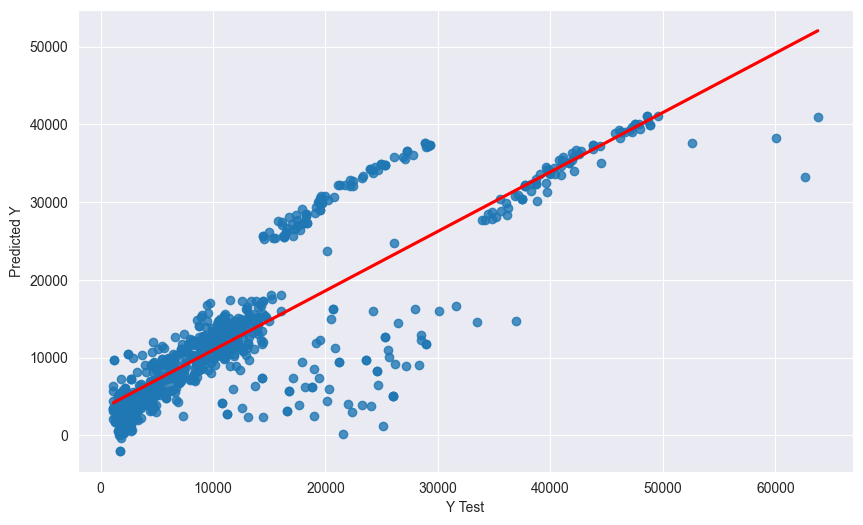

In [65]:
# Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_regression(lr, y_test, y_pred)


MSE: 1034851.8574942725
RMSE: 1017.2766867938499
MAE: 112.93266586877277
R2: 0.9926388210849492
MAPE: 1.6502683748241926%
Cross Validation: 0.9973692161465058


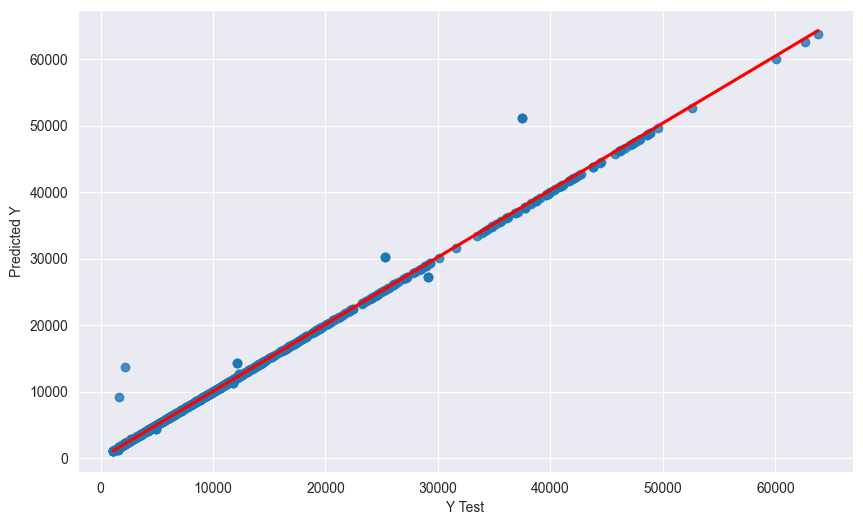

In [66]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

evaluate_regression(dt, y_test, y_pred)

MSE: 1462592.308212107
RMSE: 1209.3768263912234
MAE: 582.1074940445201
R2: 0.9895961884954281
MAPE: 8.300267508762158%
Cross Validation: 0.9941984707903071


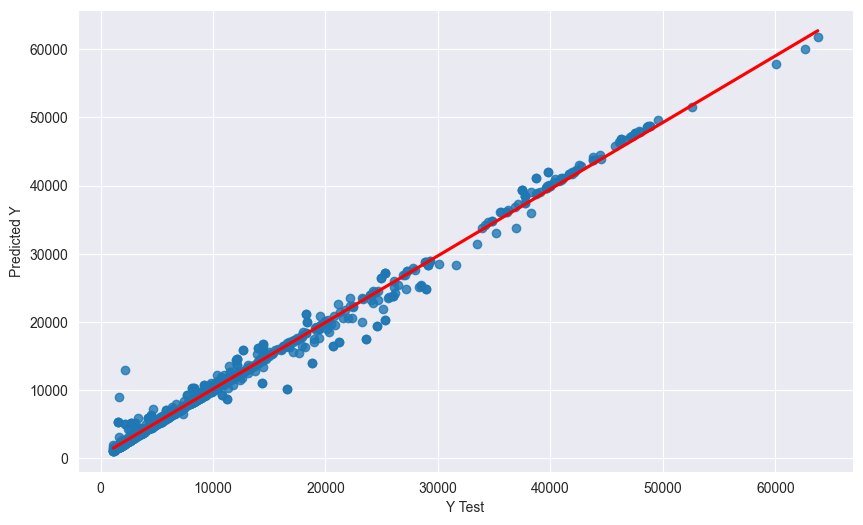

In [67]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate_regression(rf, y_test, y_pred)


MSE: 37163771.44595818
RMSE: 6096.209596622985
MAE: 4208.338010440718
R2: 0.735644122595324
MAPE: 44.7769652328354%


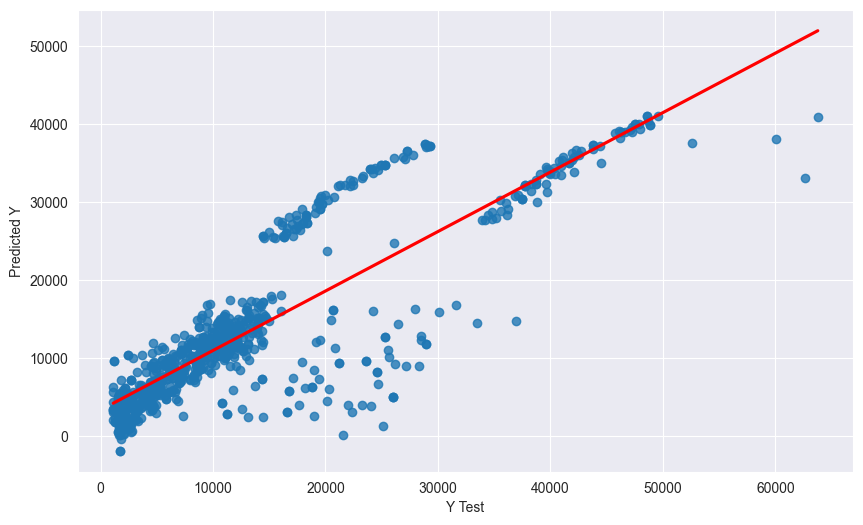

In [54]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

evaluate_regression(lasso, y_test, y_pred)


MSE: 17356268.296050828
RMSE: 4166.085488327241
MAE: 2247.0533553681075
R2: 0.8765402068908569
MAPE: 25.882789815335254%


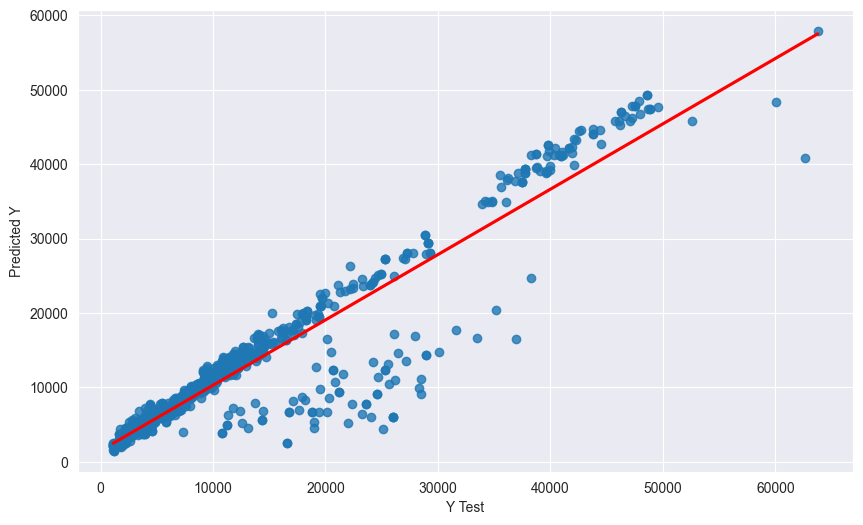

In [55]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

evaluate_regression(gb, y_test, y_pred)


### Pré-processamento de Dados

In [68]:
#Deduplicação de dados
df_dedup = df.drop_duplicates(inplace=False)

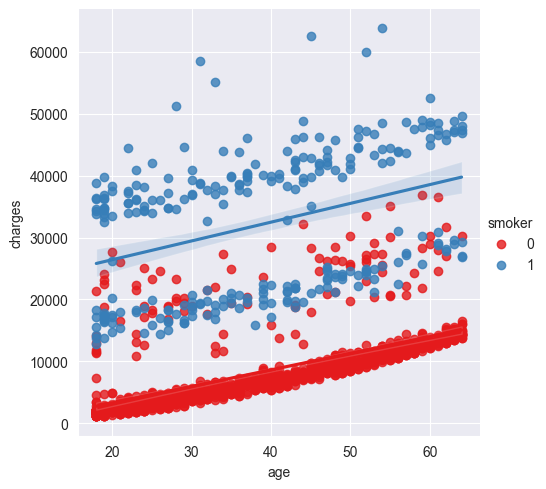

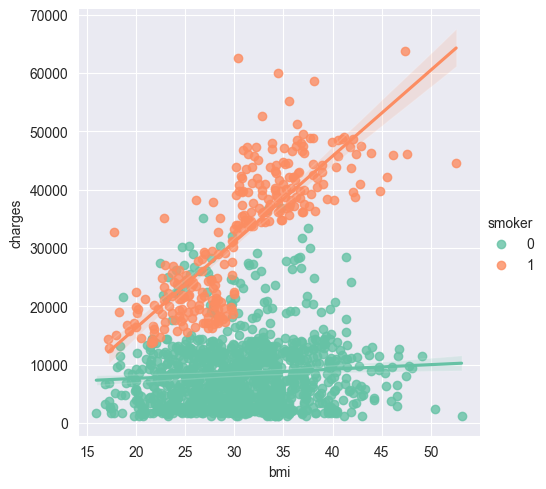

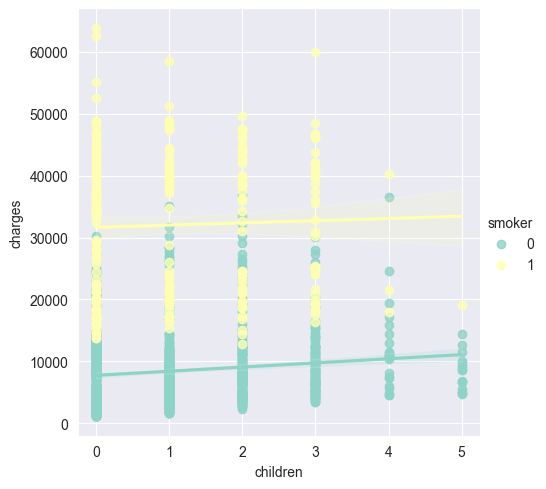

In [69]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df_dedup, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df_dedup, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df_dedup, hue='smoker', palette='Set3')

### Modelagem com dados pré-processados

In [71]:
# Separando as variáveis independentes e dependentes
X = df_dedup.drop(['charges'], axis=1)
y = df_dedup['charges']
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MSE: 30079422.66856676
RMSE: 5484.471047290409
MAE: 3960.1593551561114
R2: 0.7936771255697644
MAPE: 41.416220529502006%
Cross Validation: 0.7447076222497191


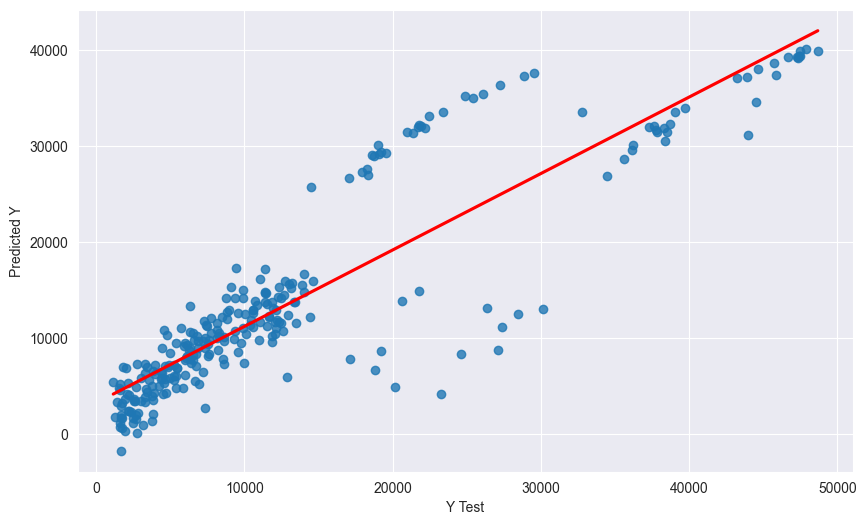

In [72]:
# Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_regression(lr, y_test, y_pred)

MSE: 48813984.501123436
RMSE: 6986.700544686557
MAE: 3088.622470744005
R2: 0.6651717120491979
MAPE: 44.74525418866402%
Cross Validation: 0.6861340185374462


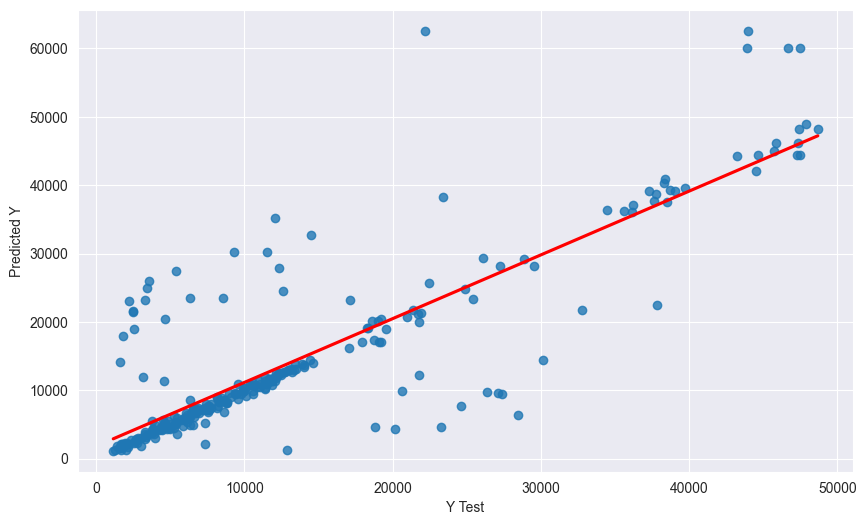

In [73]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

evaluate_regression(dt, y_test, y_pred)

MSE: 19696088.313841633
RMSE: 4438.027525133393
MAE: 2505.706232514489
R2: 0.8648992169590332
MAPE: 33.68133600632867%
Cross Validation: 0.8345373808314722


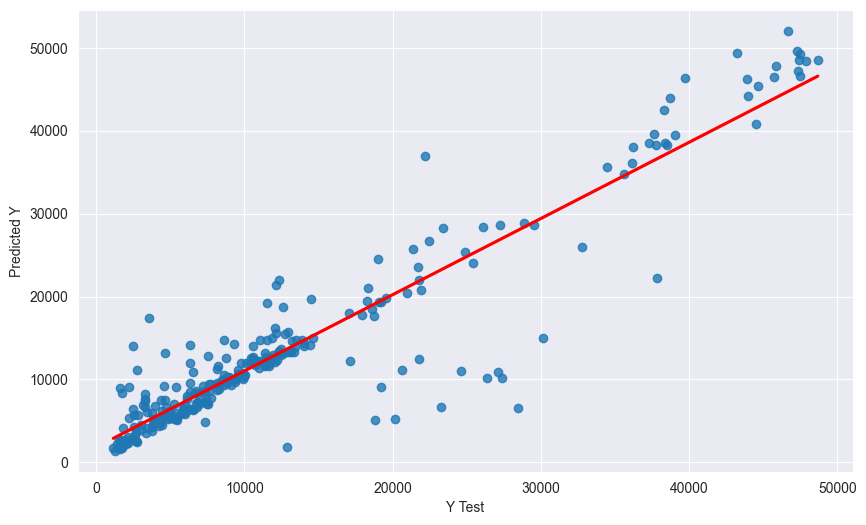

In [74]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate_regression(rf, y_test, y_pred)

MSE: 15473453.411960168
RMSE: 3933.6310721723976
MAE: 2267.4281065810114
R2: 0.8938634088660826
MAPE: 29.19497425807081%
Cross Validation: 0.851108093647774


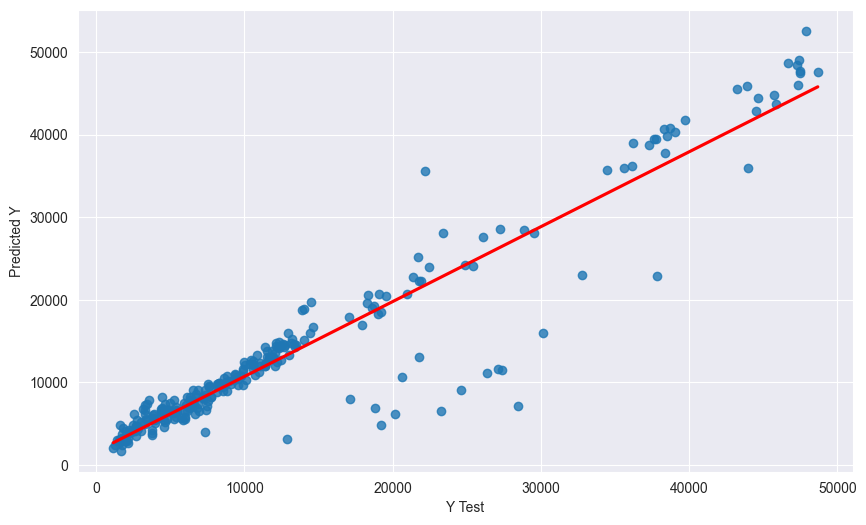

In [75]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

evaluate_regression(gb, y_test, y_pred)

#Modelagem com dados pré-processados com a biblioteca AutoViz

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (4113, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['bmi']
    Integer-Categorical Columns: ['age', 'children']
    String-Categorical Columns: ['region']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['sex', 'smoker']
    Numeric-Boolean Columns: []
    Discrete String Columns: []
    NLP text Columns: []
    Da

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,3,18.000000,64.000000,No issue
sex,object,0.000000,0,,,No issue
bmi,float64,0.000000,NA,15.960000,53.130000,Column has 9 outliers greater than upper bound (47.37) or lower than lower bound(13.53). Cap them or remove them.
children,int64,0.000000,0,0.000000,5.000000,No issue
smoker,object,0.000000,0,,,No issue
region,object,0.000000,0,,,No issue
charges,float64,0.000000,100,1121.873900,63770.428010,Target column


All Plots are saved in ./AutoViz_Plots/charges
Time to run AutoViz = 1 seconds 


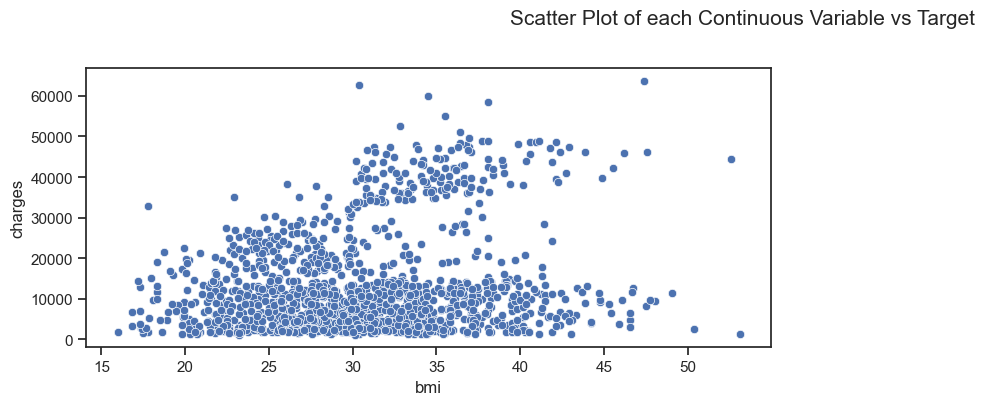

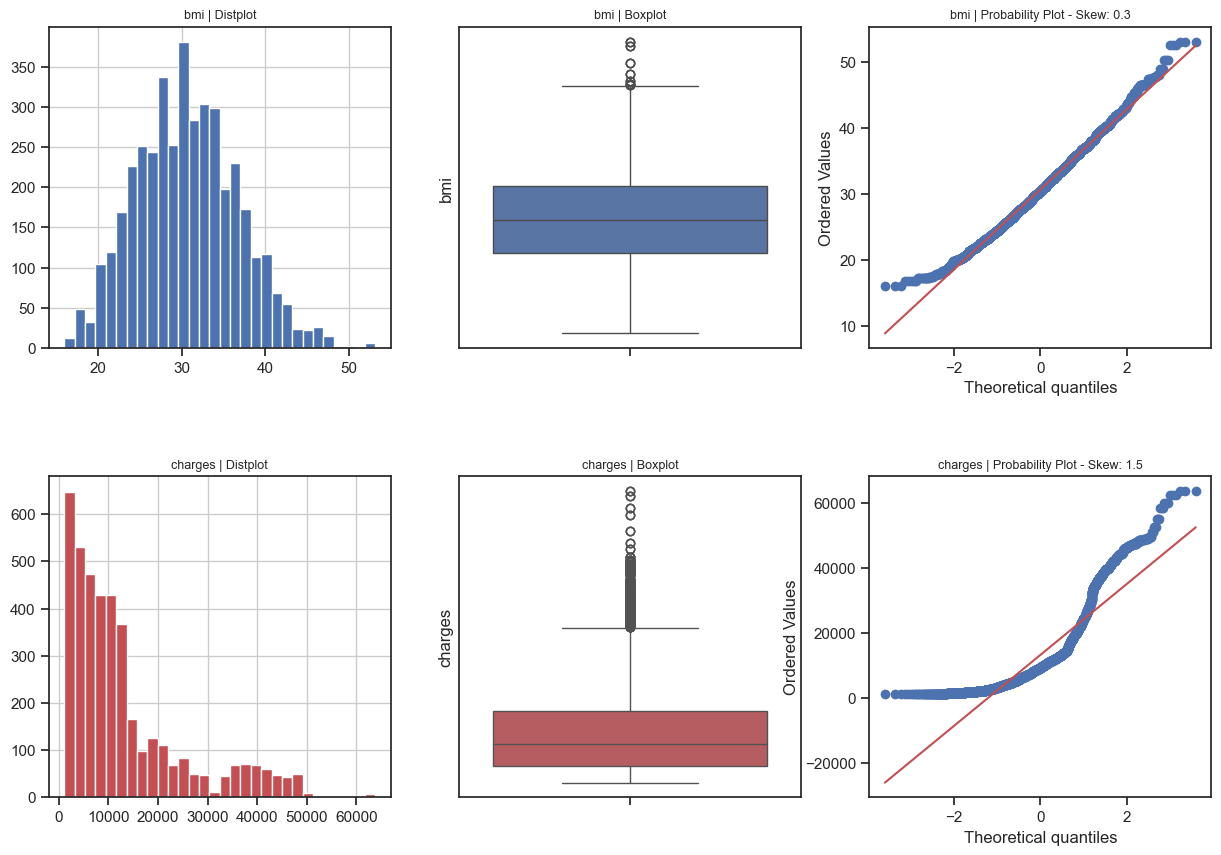

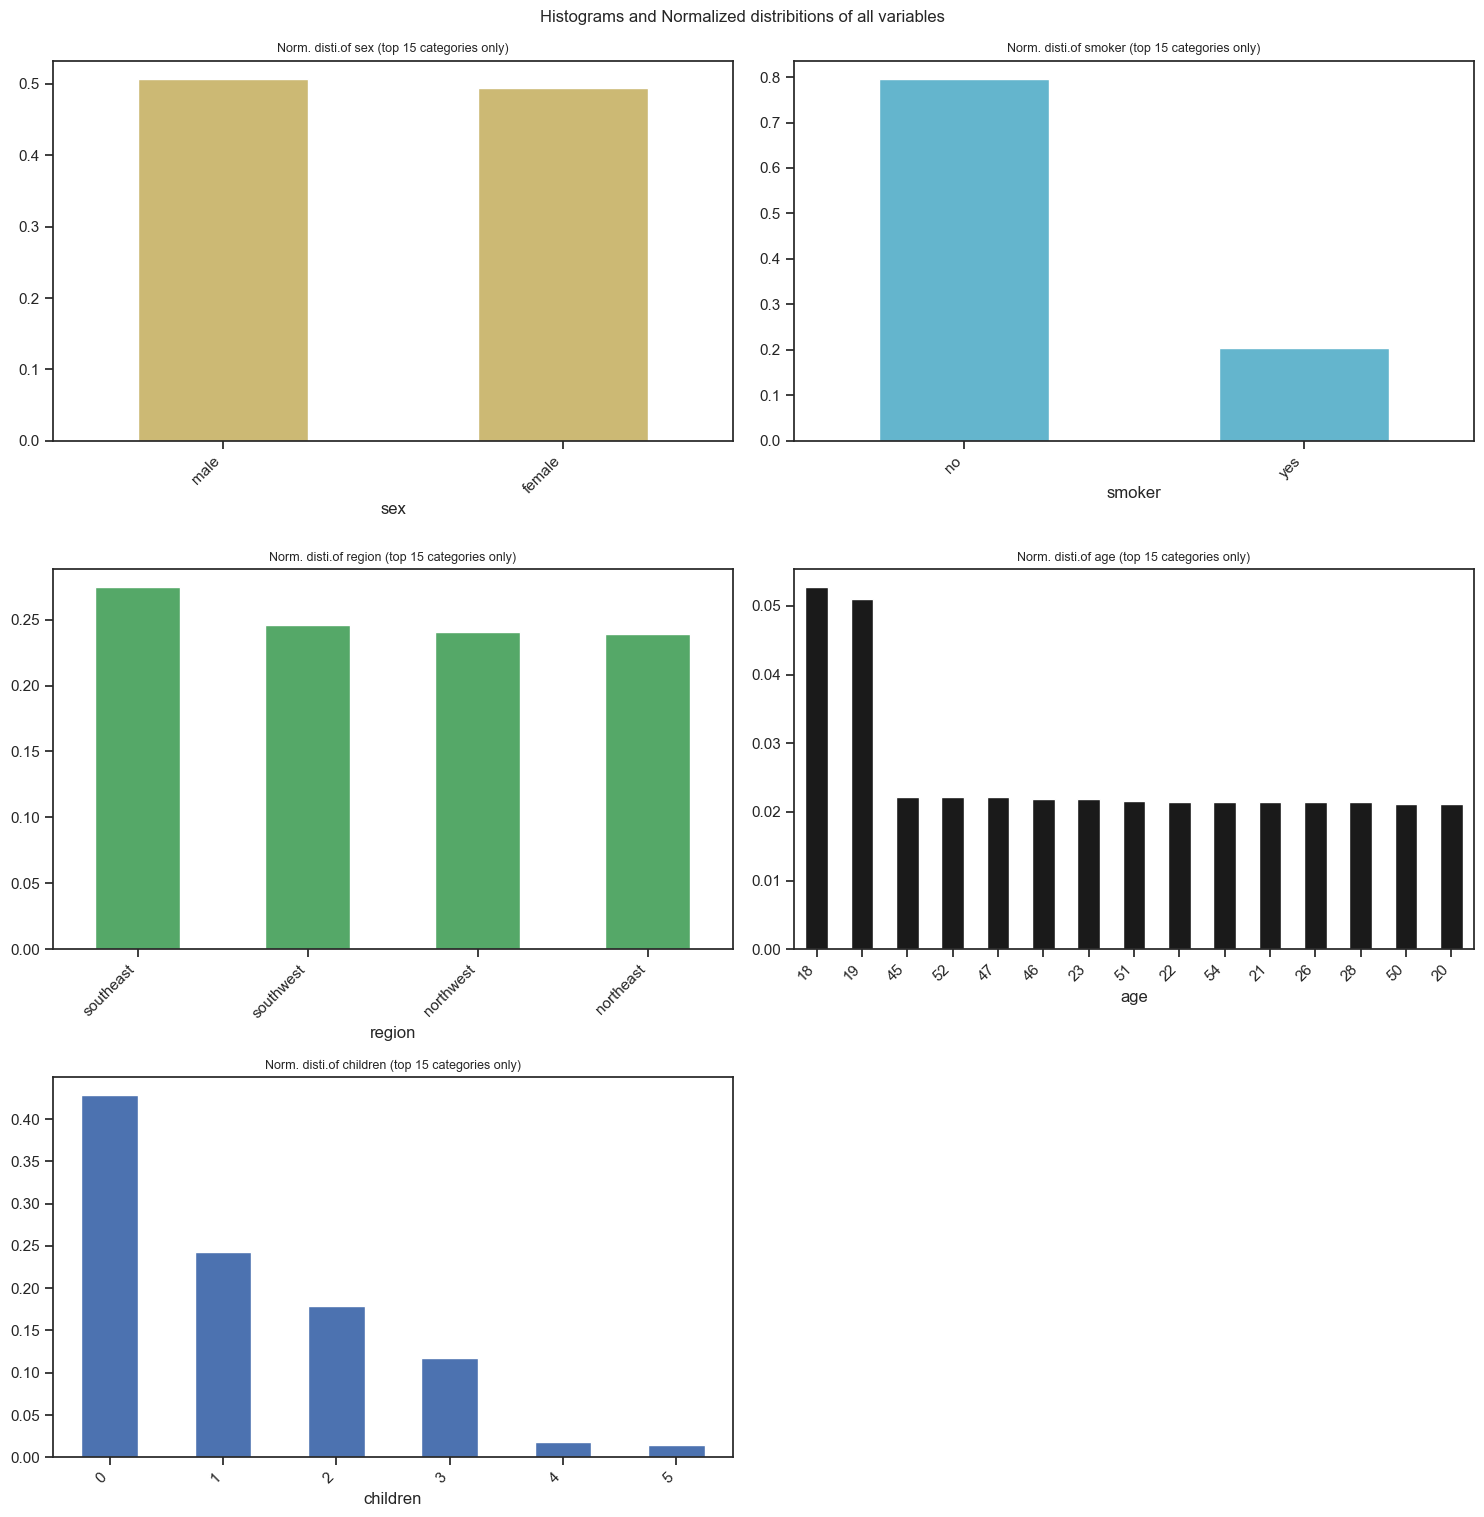

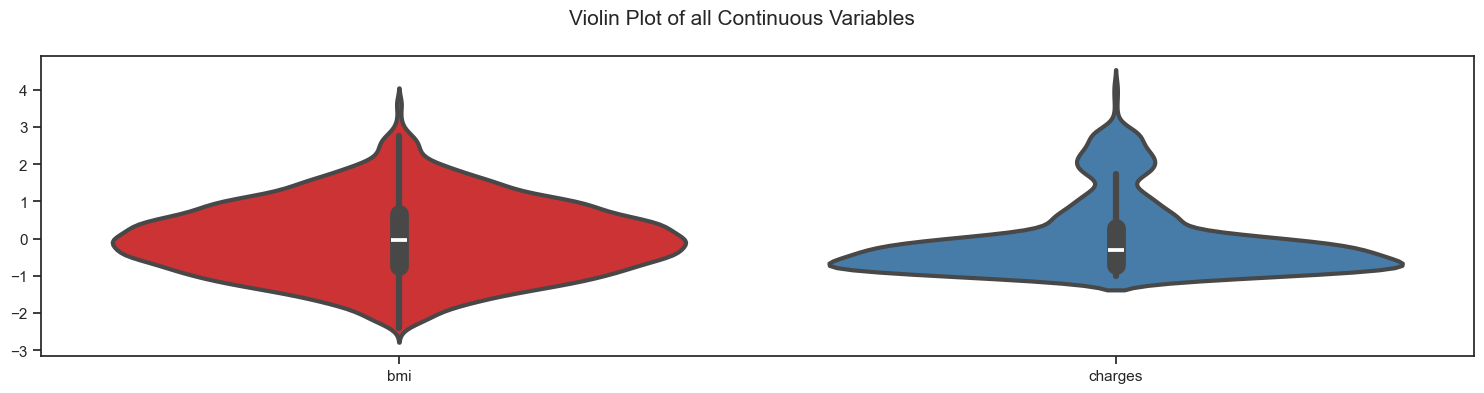

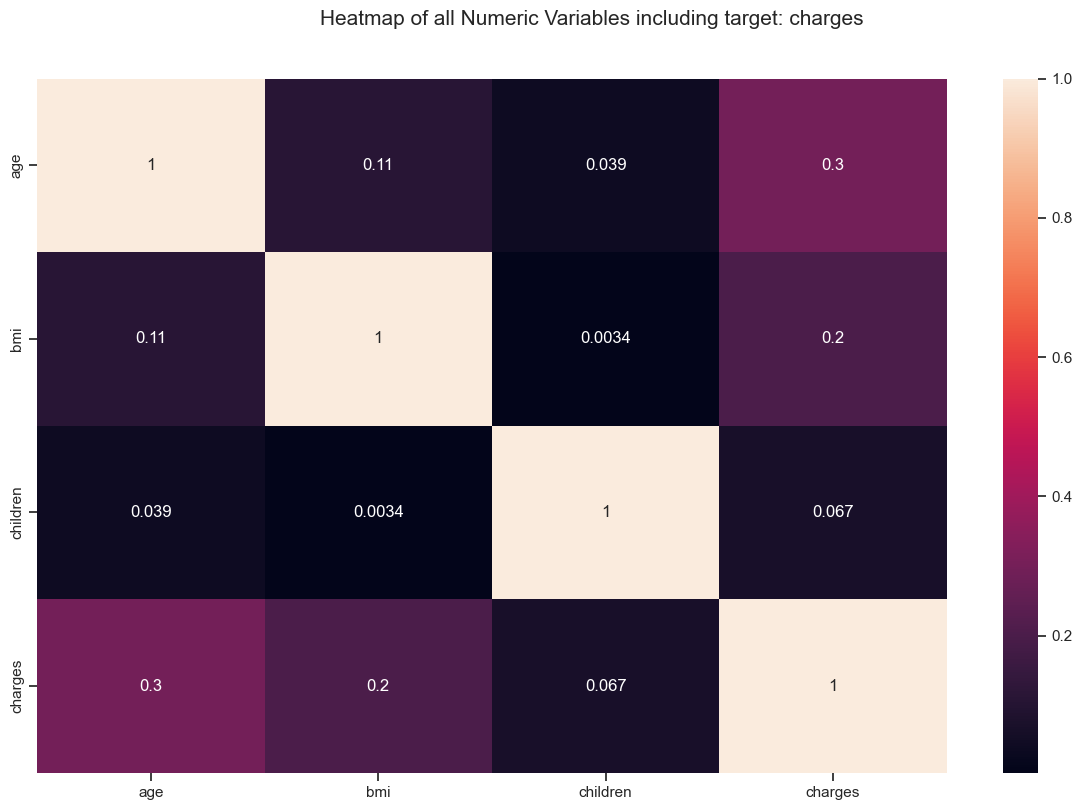

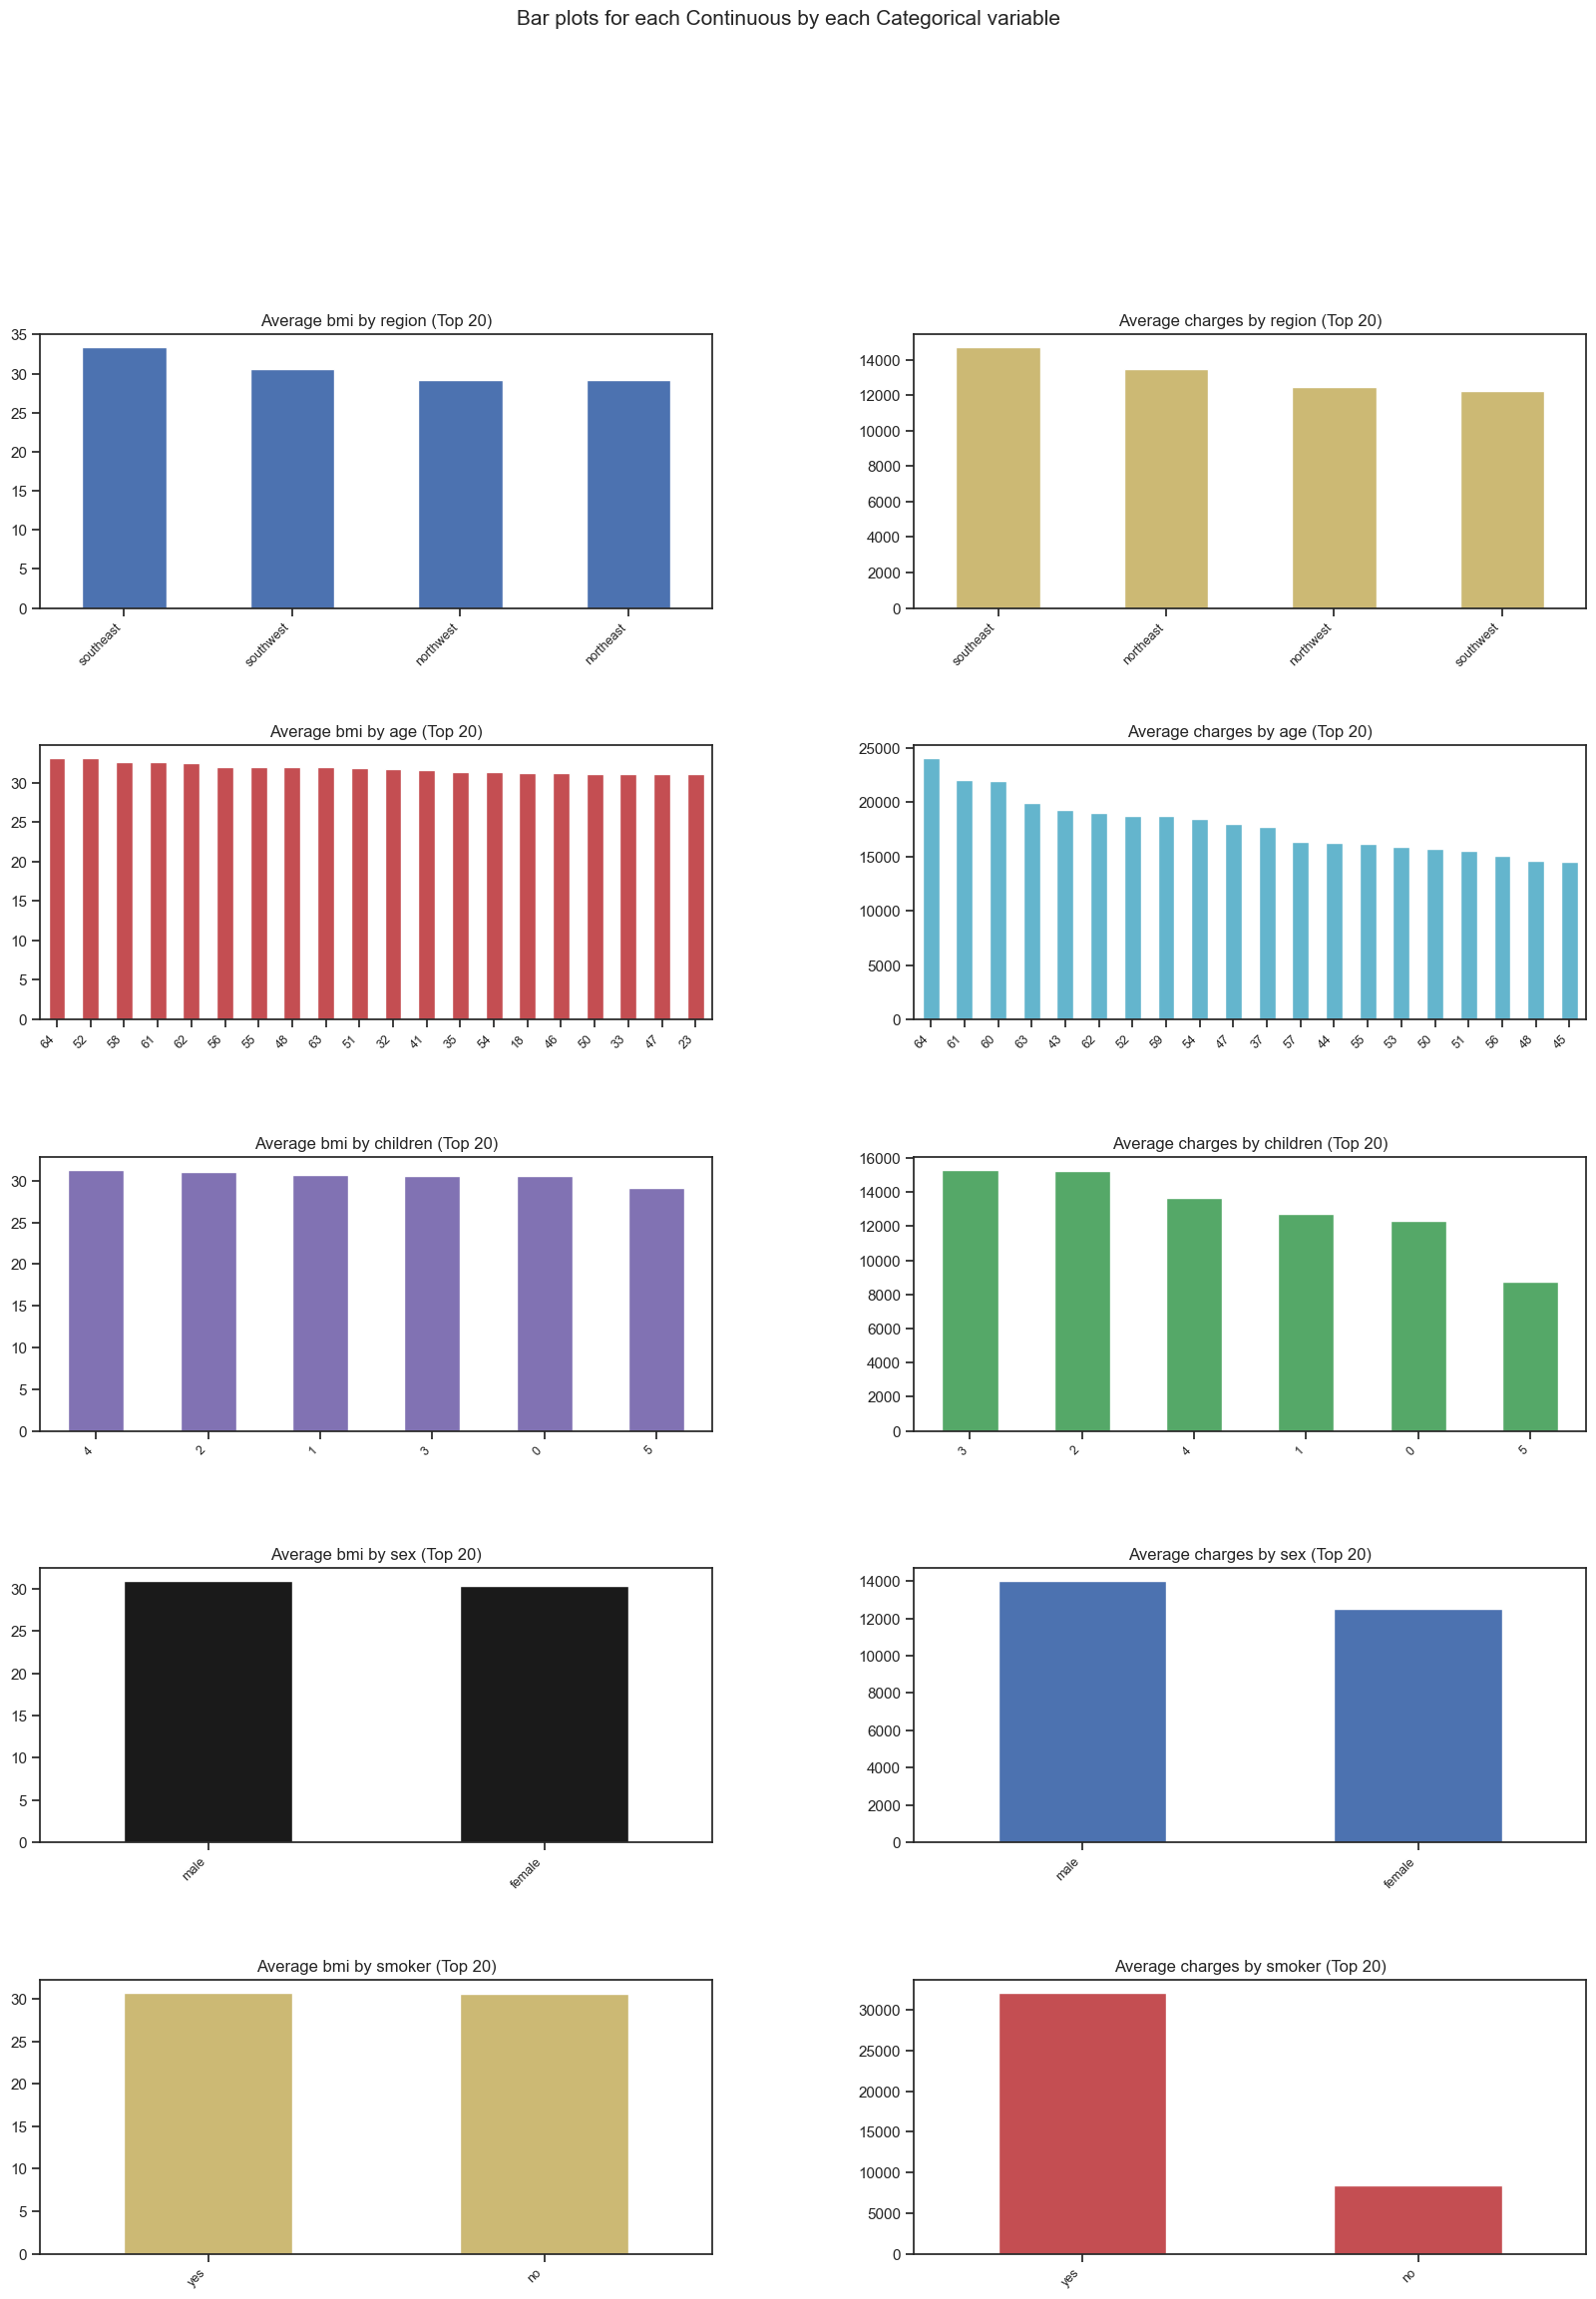

In [79]:
#Load Autoviz
from autoviz import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()

target_variable = "charges"
df_auto = pd.read_csv("medical_insurance.csv")


dft = AV.AutoViz(
    "",
    sep=",",
    depVar=target_variable,
    dfte=df_auto,
    header=0,
    verbose=2,
    lowess=False,
    max_rows_analyzed=5000,
    max_cols_analyzed=20,
    save_plot_dir=None
)

In [83]:
from autoviz import FixDQ
fixdq = FixDQ()
df_fixed = fixdq.fit_transform(df_auto)

Alert: Detecting 2773 duplicate rows...
Alert: Dropping 2773 duplicate rows can sometimes cause column data types to change to object. Double-check!


In [84]:
df_fixed.head()

,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,10.345313
1,46,male,25.857395,1,no,northeast,10.190608
2,32,male,23.014840,0,no,southwest,9.973948
3,19,female,27.900000,0,yes,southwest,9.734236
4,18,male,33.770000,1,no,southeast,7.453882


In [87]:
# Separando as variáveis independentes e dependentes
X = df_fixed.drop(['charges']+['region'], axis=1)
y = df_fixed['charges']

label = LabelEncoder()
label.fit(X.sex.drop_duplicates())
X.sex = label.transform(X.sex)
label.fit(X.smoker.drop_duplicates())
X.smoker = label.transform(X.smoker)

# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalizando os dados
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



MSE: 0.1592137897843009
RMSE: 0.399016026976738
MAE: 0.2560105192308364
R2: 0.8072468135645632
MAPE: 2.8117135397856754%
Cross Validation: 0.7578380065646347


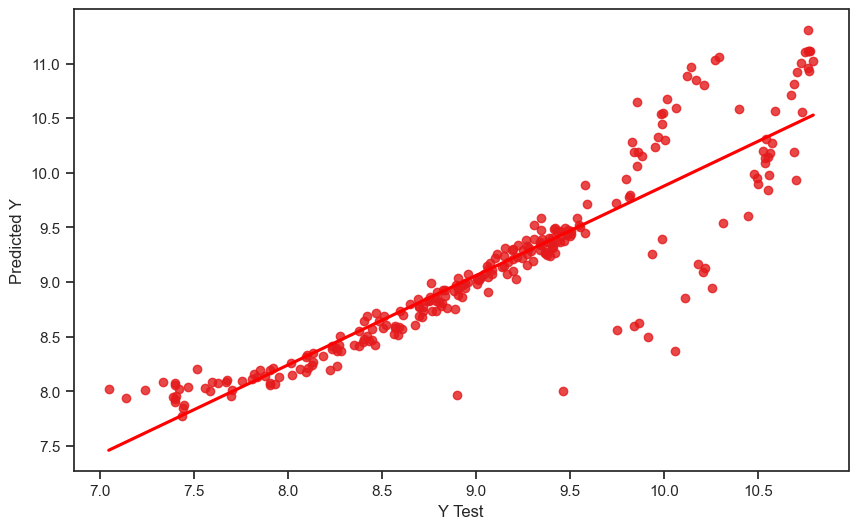

In [88]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_regression(lr, y_test, y_pred)

MSE: 0.1076894345271354
RMSE: 0.32816068400577086
MAE: 0.17208939951851487
R2: 0.8696251017034551
MAPE: 1.911397109048158%
Cross Validation: 0.8218990195336368


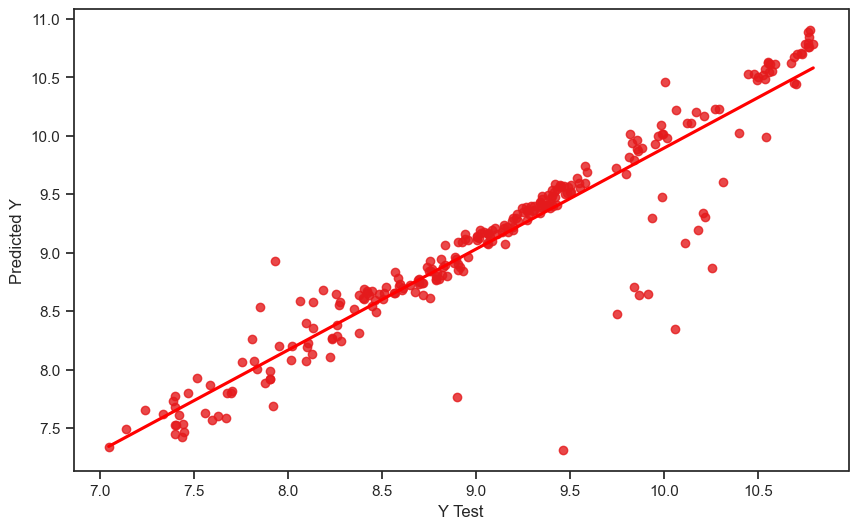

In [89]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

evaluate_regression(gb, y_test, y_pred)

MSE: 0.14537854251681503
RMSE: 0.3812853819867935
MAE: 0.20365768684244315
R2: 0.8239965435944994
MAPE: 2.3017735964640473%
Cross Validation: 0.7827365536398485


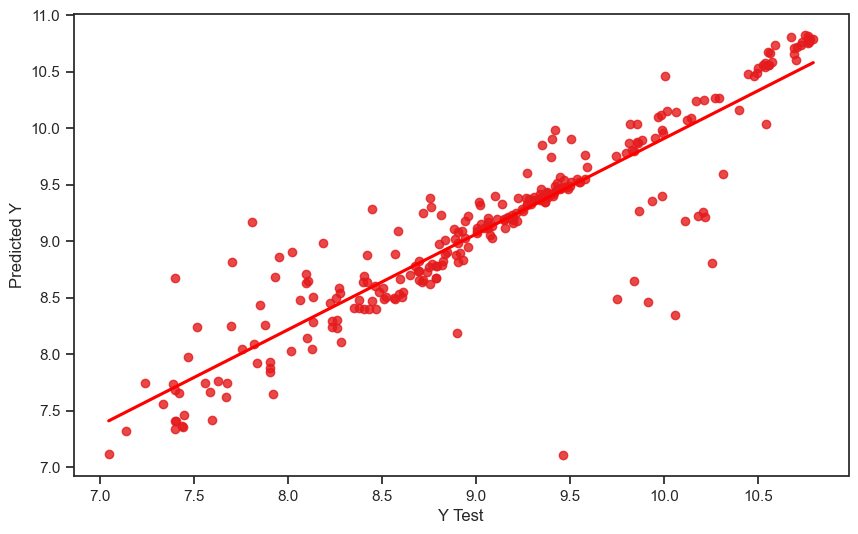

In [91]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

evaluate_regression(rf, y_test, y_pred)

MSE: 0.29697670243579244
RMSE: 0.5449556885066825
MAE: 0.2515869580525119
R2: 0.6404632678542523
MAPE: 2.8591100502563265%
Cross Validation: 0.6635727690644535


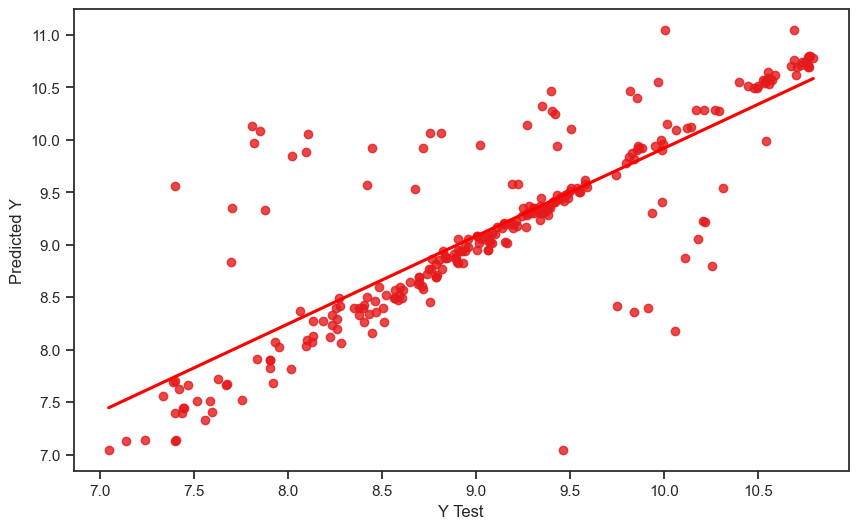

In [92]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

evaluate_regression(dt, y_test, y_pred)

### Conclusão
O modelo de regressão linear obteve um R2 de 0.78, um erro médio absoluto de 3.5 e um erro médio percentual absoluto de 26.7. O modelo de Gradient Boosting obteve um R2 de 0.87, um erro médio absoluto de 2.6 e um erro médio percentual absoluto de 19.7. Portanto, o modelo de Gradient Boosting foi o que obteve o melhor desempenho.
 